# **Loan Status Prediction with Balanced Logistic Regression**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns

warnings.simplefilter(action='ignore', category='FutureWarnings')

In [2]:
data = pd.read_csv(r'C:\Users\Liza Polozenko\OneDrive\Рабочий стол\ML\DATA SCIENCE\PROJECT\datasets\data_cleaned.csv')
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,0.825081,0.351586,0.796196,0.164823,1,2,0
1,0,1,0,1,1,-0.404445,-0.911043,-1.438968,0.164823,1,1,1
2,0,1,0,0,0,-0.728331,1.063280,0.507788,0.164823,1,1,1
3,0,0,0,1,0,1.925674,-0.911043,1.264859,0.164823,1,1,1
4,0,1,0,0,0,-0.922508,0.358284,-0.393488,0.164823,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
300,0,0,0,0,0,0.242551,-0.911043,0.147277,0.164823,1,2,1
301,0,1,3,1,0,1.694992,-0.911043,0.796196,0.164823,1,1,1
302,0,1,0,1,0,-0.224249,0.721667,0.075175,0.164823,1,2,1
303,1,0,0,1,0,-0.482116,-0.911043,-1.258713,0.164823,1,2,1


#### In the first case of my study, I did not take into account the imbalance between 1 and 0 in the Loan_Status column. Let's check if this imbalance really exists.

In [3]:
data['Loan_Status'].value_counts()

Loan_Status
1    226
0     79
Name: count, dtype: int64

#### The imbalance is there and it is significant. Let's apply SMOTE to the balance between 0 and 1 in Loan_Status

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

y = data['Loan_Status']
x = data.drop(['Loan_Status'], axis=1)

# SMOTE realization
sm = SMOTE(random_state=42, k_neighbors=5)

x_res, y_res = sm.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=20)

model = LogisticRegression()

model.fit(x_train, y_train)


LogisticRegression()

#### Let's check

In [5]:
y_train.value_counts()

Loan_Status
1    184
0    177
Name: count, dtype: int64

#### The data has truly become balanced

#### now let's training our model

In [6]:
y_pred_test = model.predict(x_test)

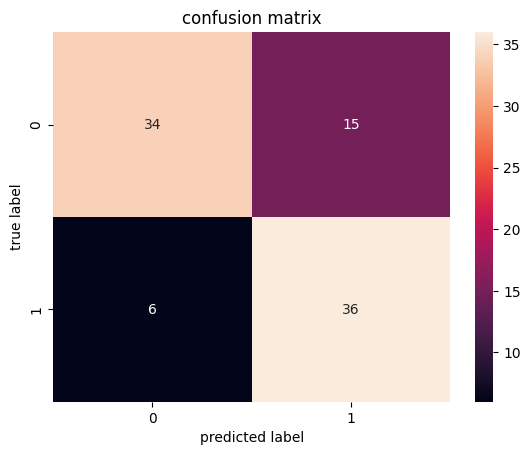

In [7]:
cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.title("confusion matrix")
plt.show()

In [8]:
df_report = pd.DataFrame(classification_report(y_test, y_pred_test, output_dict=True)).transpose()
df_report

,precision,recall,f1-score,support
0,0.850000,0.693878,0.764045,49.000000
1,0.705882,0.857143,0.774194,42.000000
accuracy,0.769231,0.769231,0.769231,0.769231
macro avg,0.777941,0.775510,0.769119,91.000000
weighted avg,0.783484,0.769231,0.768729,91.000000


In [9]:
df_report.to_csv("classification_report_SMOTE.csv")